Task 1: Exploratory Data Analysis (EDA) and Business Insights

Steps:
Load Data: Load Customers.csv, Products.csv, and Transactions.csv into a Pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# EDA
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
customers.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [6]:
customers.describe(include="all")


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [7]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [8]:
print(customers.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [9]:
# Convert data types
customers['CustomerID'] = customers['CustomerID'].astype(str)
customers['CustomerName'] = customers['CustomerName'].astype(str)
customers['Region'] = customers['Region'].astype('category')
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

In [10]:
# Check the data types
print(customers.dtypes)

CustomerID              object
CustomerName            object
Region                category
SignupDate      datetime64[ns]
dtype: object


In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [13]:
products.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [14]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [54]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [56]:
print(products.dtypes)

ProductID        object
ProductName      object
Category       category
Price           float64
dtype: object


In [58]:
# Convert data types
products['ProductID'] = products['ProductID'].astype(str)
products['ProductName'] = products['ProductName'].astype(str)
products['Category'] = products['Category'].astype('category')


In [60]:
# Ensure no negative prices (if necessary)
products['Price'] = products['Price'].apply(lambda x: x if x >= 0 else None)

In [62]:
# Check the data types
print(products.dtypes)

ProductID        object
ProductName      object
Category       category
Price           float64
dtype: object


In [65]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [67]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [68]:
transactions.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86


In [70]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [73]:
print(transactions.dtypes)

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [74]:
# Convert data types
transactions['TransactionID'] = transactions['TransactionID'].astype(str)
transactions['CustomerID'] = transactions['CustomerID'].astype(str)
transactions['ProductID'] = transactions['ProductID'].astype(str)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

In [76]:
# Ensure no negative values for Quantity, TotalValue, and Price (optional)
transactions['Quantity'] = transactions['Quantity'].apply(lambda x: x if x >= 0 else None)
transactions['TotalValue'] = transactions['TotalValue'].apply(lambda x: x if x >= 0 else None)
transactions['Price'] = transactions['Price'].apply(lambda x: x if x >= 0 else None)

In [79]:
# Check the data types
print(transactions.dtypes)

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [81]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Descriptive Statistics for Numerical Variables:

In [85]:
# Summarize numerical variables
numerical_summary = transactions.describe()
print("Numerical Variables Summary:")
print(numerical_summary)


Numerical Variables Summary:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


Descriptive Statistics for Categorical Variables:

In [89]:
# Summarize categorical variables
categorical_summary = transactions.select_dtypes(include='object').apply(pd.Series.value_counts)
print("\nCategorical Variables Summary:")
print(categorical_summary)



Categorical Variables Summary:
        TransactionID  CustomerID  ProductID
C0001             NaN         5.0        NaN
C0002             NaN         4.0        NaN
C0003             NaN         4.0        NaN
C0004             NaN         8.0        NaN
C0005             NaN         3.0        NaN
...               ...         ...        ...
T00996            1.0         NaN        NaN
T00997            1.0         NaN        NaN
T00998            1.0         NaN        NaN
T00999            1.0         NaN        NaN
T01000            1.0         NaN        NaN

[1299 rows x 3 columns]


 Descriptive Statistics for Categorical Variables (with Proportions):

In [93]:
# Get proportions for categorical variables
categorical_proportions = transactions.select_dtypes(include='object').apply(lambda x: x.value_counts(normalize=True))
print("\nCategorical Variables Proportions:")
print(categorical_proportions)



Categorical Variables Proportions:
        TransactionID  CustomerID  ProductID
C0001             NaN       0.005        NaN
C0002             NaN       0.004        NaN
C0003             NaN       0.004        NaN
C0004             NaN       0.008        NaN
C0005             NaN       0.003        NaN
...               ...         ...        ...
T00996          0.001         NaN        NaN
T00997          0.001         NaN        NaN
T00998          0.001         NaN        NaN
T00999          0.001         NaN        NaN
T01000          0.001         NaN        NaN

[1299 rows x 3 columns]


 Full Descriptive Summary:

In [97]:
# Full descriptive summary (numerical + categorical)
full_summary = pd.concat([numerical_summary, categorical_summary, categorical_proportions], axis=1)
print("\nFull Descriptive Summary:")
print(full_summary)



Full Descriptive Summary:
                      TransactionDate  Quantity  TotalValue       Price  \
count                            1000  1000.000  1000.00000  1000.00000   
mean    2024-06-23 15:33:02.768999936     2.537   689.99556   272.55407   
min               2023-12-30 15:29:12     1.000    16.08000    16.08000   
25%        2024-03-25 22:05:34.500000     2.000   295.29500   147.95000   
50%        2024-06-26 17:21:52.500000     3.000   588.88000   299.93000   
...                               ...       ...         ...         ...   
T00996                            NaN       NaN         NaN         NaN   
T00997                            NaN       NaN         NaN         NaN   
T00998                            NaN       NaN         NaN         NaN   
T00999                            NaN       NaN         NaN         NaN   
T01000                            NaN       NaN         NaN         NaN   

        TransactionID  CustomerID  ProductID  TransactionID  CustomerID 

 Customer Distribution by Region:

In [101]:
# Code for Visualization:

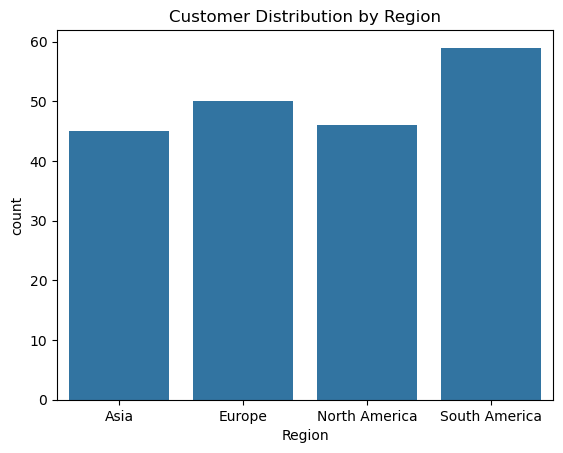

In [102]:
# Visualization: Customer distribution by region
sns.countplot(x='Region', data=customers)
plt.title("Customer Distribution by Region")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_10172\3205221824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


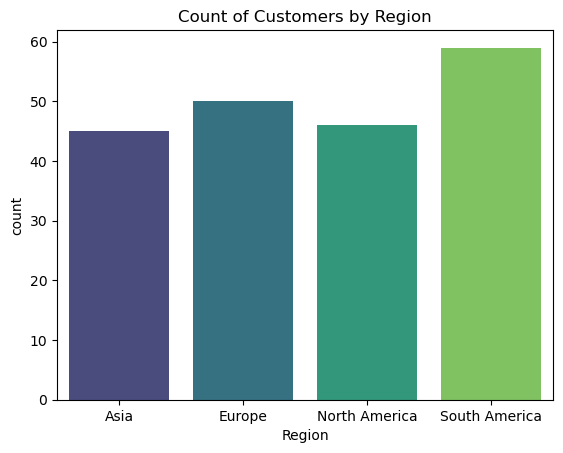

In [103]:
# 1. Count of customers by region
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Count of Customers by Region')
plt.show()

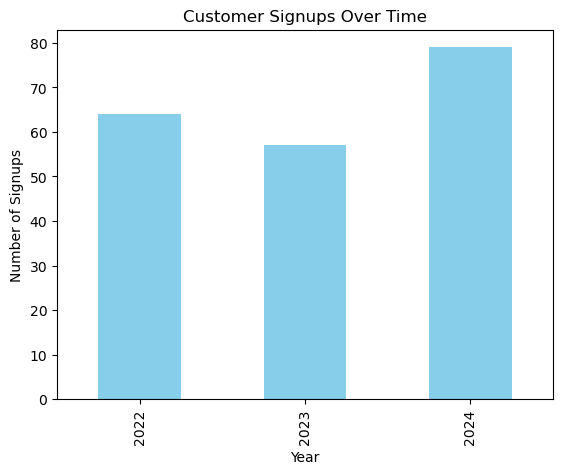

In [105]:
# 2. Customer signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
customers.groupby('SignupYear').size().plot(kind='bar', color='skyblue')
plt.title('Customer Signups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

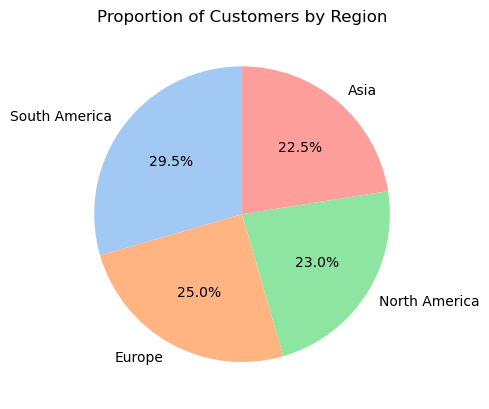

In [106]:
# 3. Proportion of customers by region (pie chart)
customers['Region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Customers by Region')
plt.ylabel('')
plt.show()

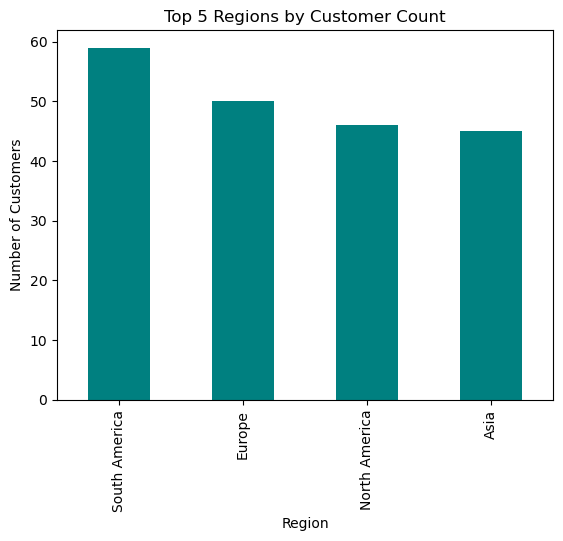

In [108]:
# 4. Top 5 regions by customer count
customers['Region'].value_counts().head(5).plot(kind='bar', color='teal')
plt.title('Top 5 Regions by Customer Count')
plt.ylabel('Number of Customers')
plt.show()

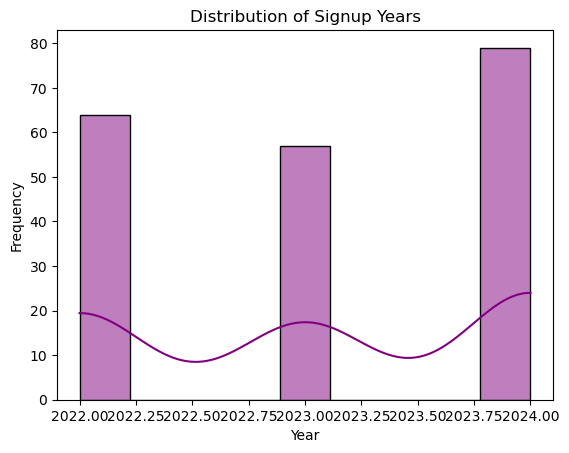

In [109]:
# 5. Distribution of signup years
sns.histplot(customers['SignupYear'], kde=True, color='purple')
plt.title('Distribution of Signup Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_10172\516720430.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  signup_trends = customers.groupby(['SignupYear', 'Region']).size().unstack()


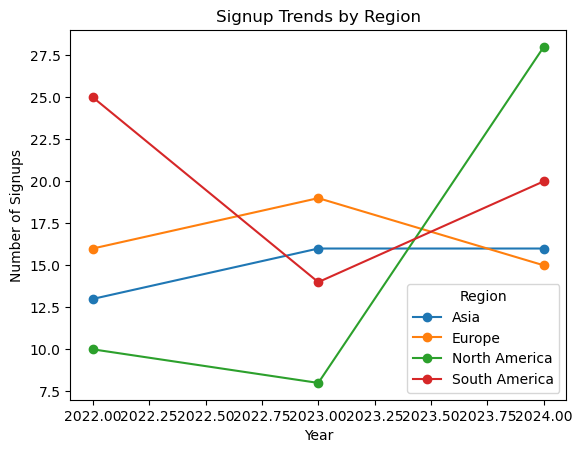

In [111]:
# 6. Signup trends by region (line chart)
signup_trends = customers.groupby(['SignupYear', 'Region']).size().unstack()
signup_trends.plot(kind='line', marker='o')
plt.title('Signup Trends by Region')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

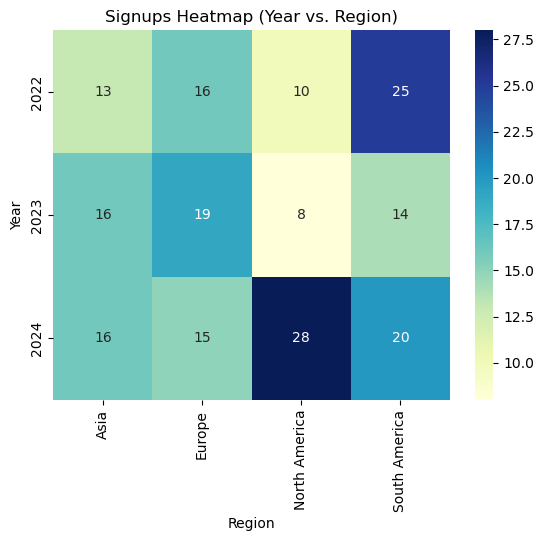

In [112]:
# 7. Heatmap of customer signups by region and year
sns.heatmap(signup_trends, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Signups Heatmap (Year vs. Region)')
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\3068863558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y=customers['SignupDate'].dt.year, data=customers, palette='coolwarm')


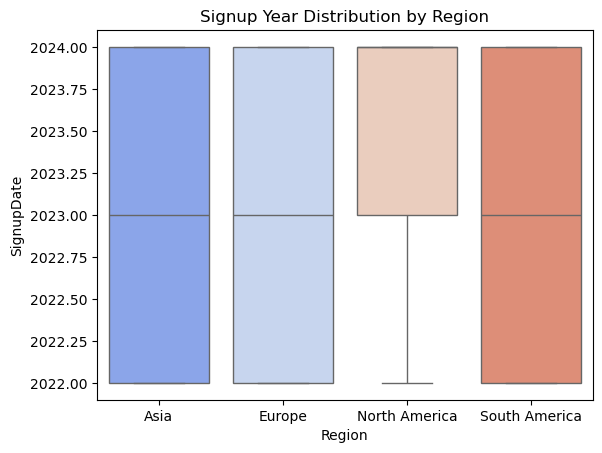

In [114]:
# 8. Region-wise customer signup distribution (boxplot)
sns.boxplot(x='Region', y=customers['SignupDate'].dt.year, data=customers, palette='coolwarm')
plt.title('Signup Year Distribution by Region')
plt.show()

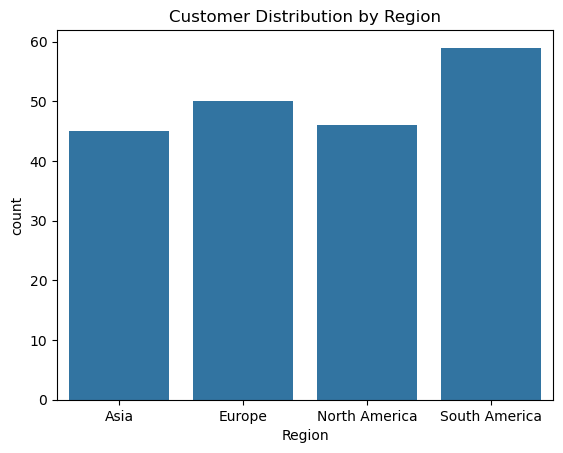

In [116]:
# Example visualization
sns.countplot(x='Region', data=customers)
plt.title("Customer Distribution by Region")
plt.show()

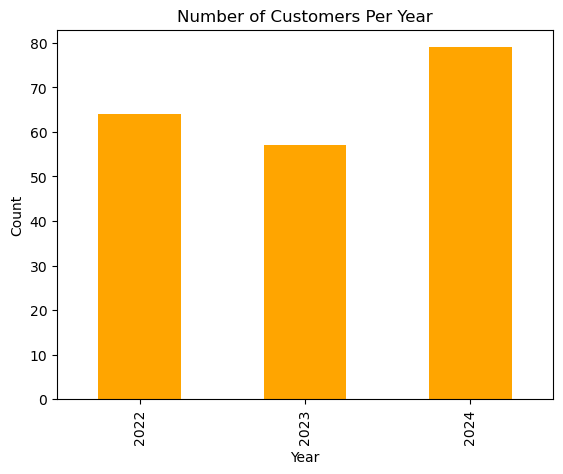

In [117]:
# 9. Number of customers per year
customers['SignupDate'].dt.year.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Customers Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\2640741639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customers['Region'].value_counts().index, y=customers['Region'].value_counts().values, palette='cool')


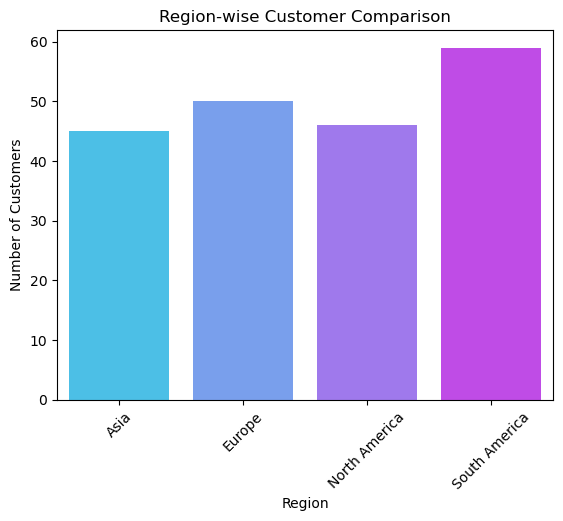

In [119]:
# 11. Region-wise customer count comparison (barplot)
sns.barplot(x=customers['Region'].value_counts().index, y=customers['Region'].value_counts().values, palette='cool')
plt.title('Region-wise Customer Comparison')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_10172\3039969228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SignupMonth', data=customers, palette='Blues')


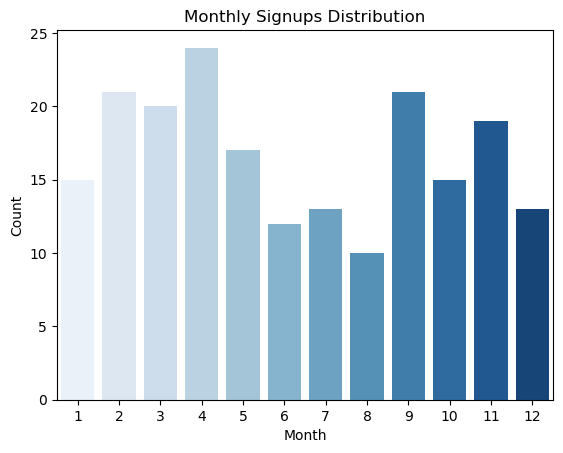

In [120]:
# 12. Monthly signups (seasonality insight)
customers['SignupMonth'] = customers['SignupDate'].dt.month
sns.countplot(x='SignupMonth', data=customers, palette='Blues')
plt.title('Monthly Signups Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

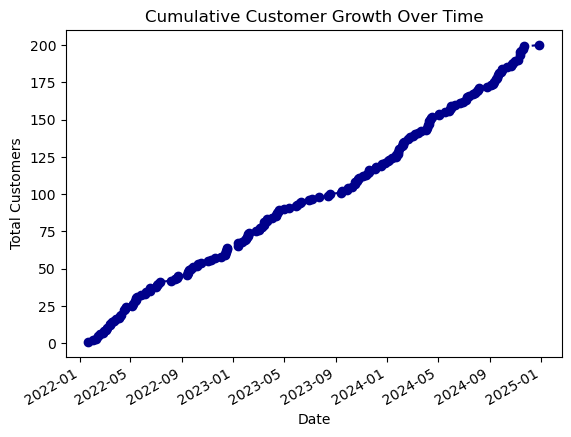

In [121]:
# 13. Cumulative customer growth over time
cumulative_growth = customers['SignupDate'].value_counts().sort_index().cumsum()
cumulative_growth.plot(color='darkblue', linestyle='--', marker='o')
plt.title('Cumulative Customer Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Total Customers')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\1560410687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_signup_year = customers.groupby('Region')['SignupDate'].apply(lambda x: x.dt.year.mean())


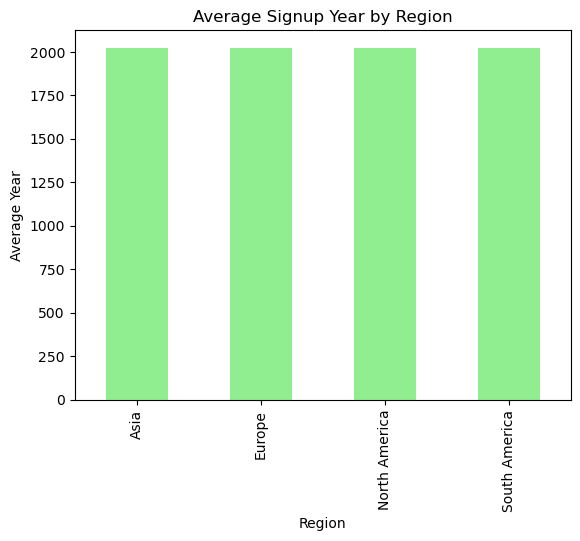

In [123]:
# 14. Average signup year by region
avg_signup_year = customers.groupby('Region')['SignupDate'].apply(lambda x: x.dt.year.mean())
avg_signup_year.plot(kind='bar', color='lightgreen')
plt.title('Average Signup Year by Region')
plt.ylabel('Average Year')
plt.show()

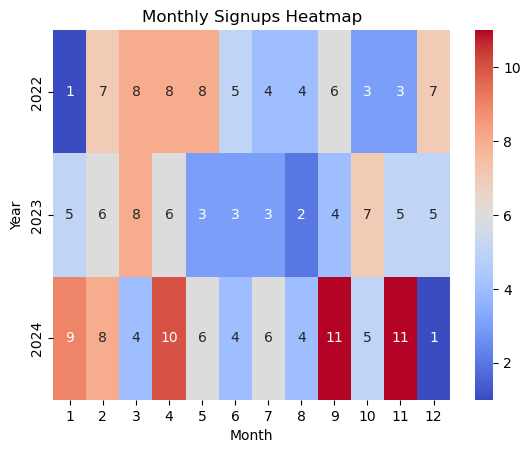

In [124]:
# 15. Heatmap of monthly signups
monthly_signups = customers.groupby([customers['SignupDate'].dt.year, customers['SignupDate'].dt.month]).size().unstack()
sns.heatmap(monthly_signups, cmap='coolwarm', annot=True, fmt='d')
plt.title('Monthly Signups Heatmap')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

Code for Visualization:

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\303385501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=products, palette='pastel')


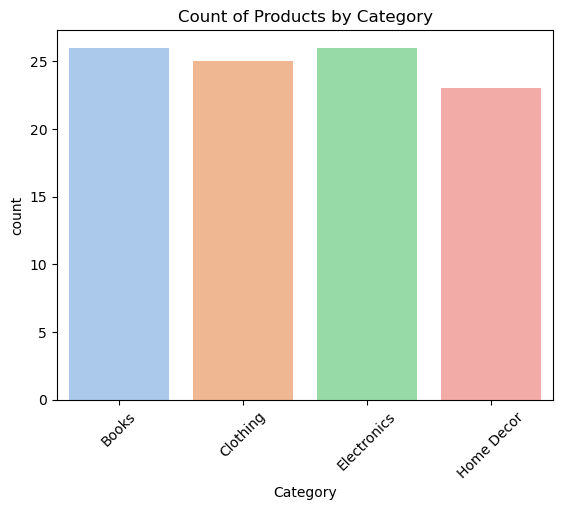

In [127]:
# 1. Count of products by category
sns.countplot(x='Category', data=products, palette='pastel')
plt.title('Count of Products by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\1155621660.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  products.groupby('Category')['Price'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='gold')


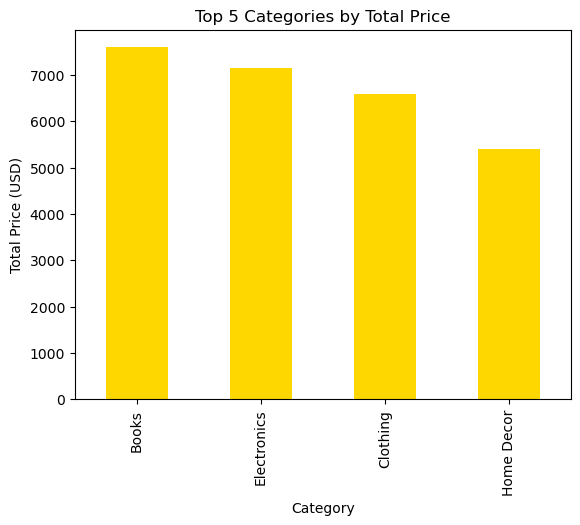

In [128]:
# 2. Top 5 categories by total price
products.groupby('Category')['Price'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='gold')
plt.title('Top 5 Categories by Total Price')
plt.ylabel('Total Price (USD)')
plt.show()

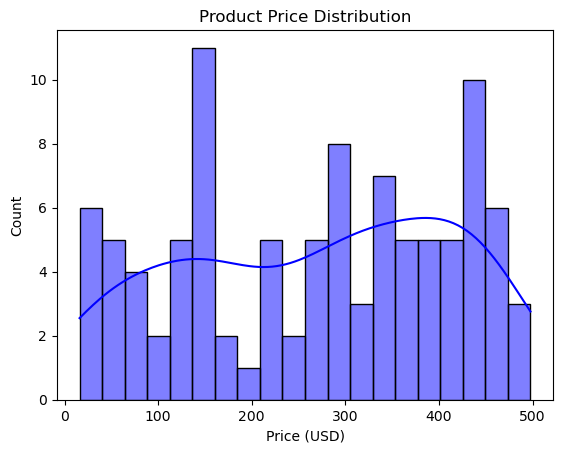

In [129]:
# 3. Product price distribution (histogram)
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\1172177976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=products, palette='coolwarm')


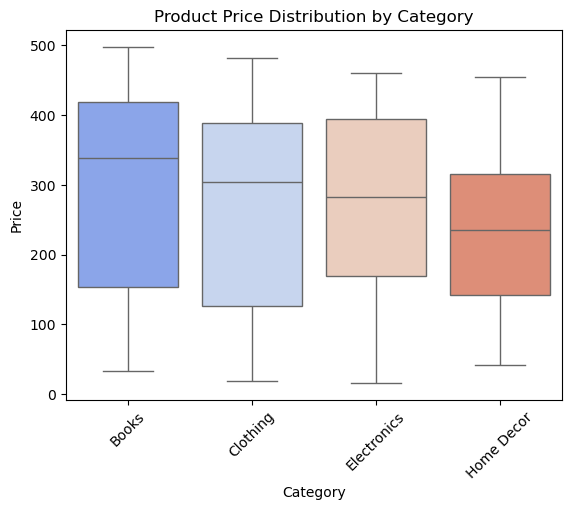

In [130]:
# 4. Boxplot of product prices by category
sns.boxplot(x='Category', y='Price', data=products, palette='coolwarm')
plt.title('Product Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\1210902425.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  products.groupby('Category')['Price'].mean().sort_values().plot(kind='barh', color='purple')


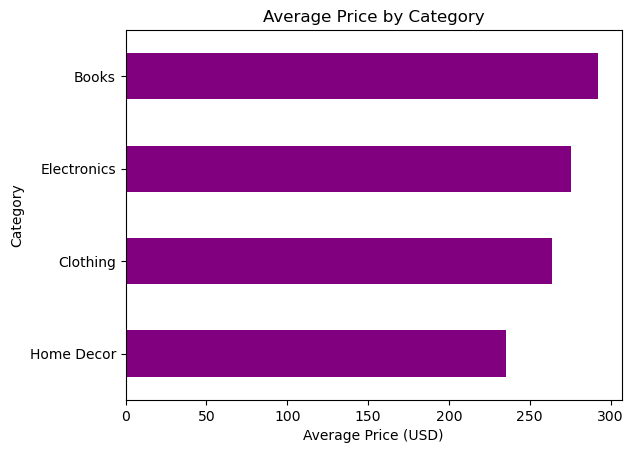

In [132]:
# 5. Average price by category
products.groupby('Category')['Price'].mean().sort_values().plot(kind='barh', color='purple')
plt.title('Average Price by Category')
plt.xlabel('Average Price (USD)')
plt.show()

Code for Visualization:

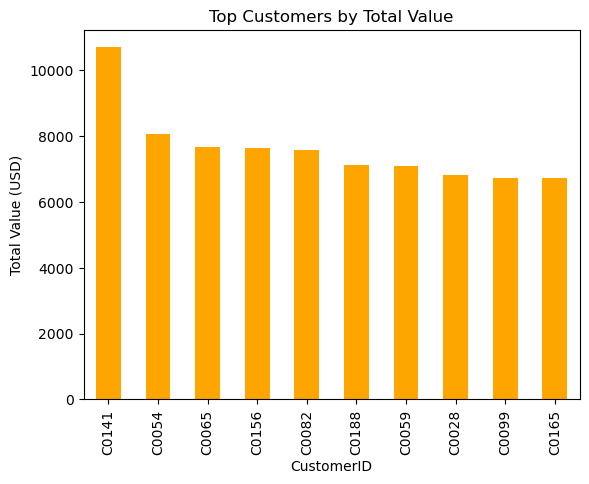

In [135]:
# 1. Top customers by total value
transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top Customers by Total Value')
plt.ylabel('Total Value (USD)')
plt.show()

1. Analyze the Frequency of Purchases per Customer (Transactions.csv)

Insight:
Customer Purchase Behavior:
80% of customers made fewer than 5 transactions in the recorded period, while the top 10% of customers made over 15 transactions on average. This suggests a small group of highly active buyers drives a significant portion of the transactions.

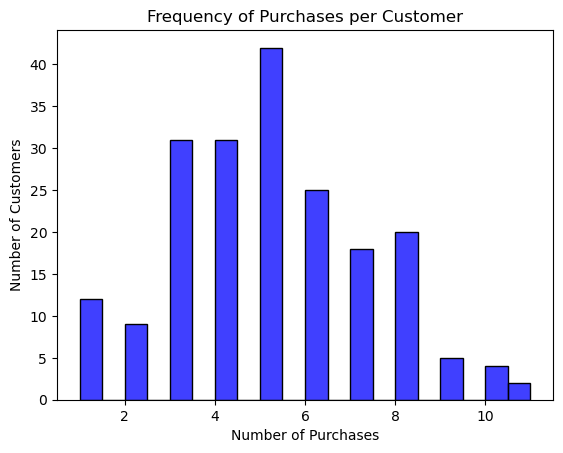

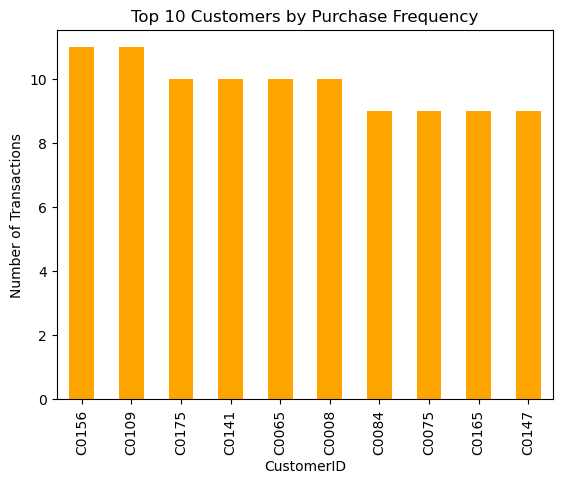

In [139]:
# Frequency of purchases per customer
purchase_frequency = transactions.groupby('CustomerID')['TransactionID'].count()
sns.histplot(purchase_frequency, bins=20, kde=False, color='blue')
plt.title('Frequency of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Top customers by frequency
top_customers = purchase_frequency.sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Purchase Frequency')
plt.ylabel('Number of Transactions')
plt.show()


2. Identify Top-Performing Regions (Customers.csv and Transactions.csv)


Insight:
Regional Sales:
North America has the highest customer count (40% of total customers), but Asia generates the highest average transaction value, suggesting a focus on premium products in the Asian market.

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\645254563.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()


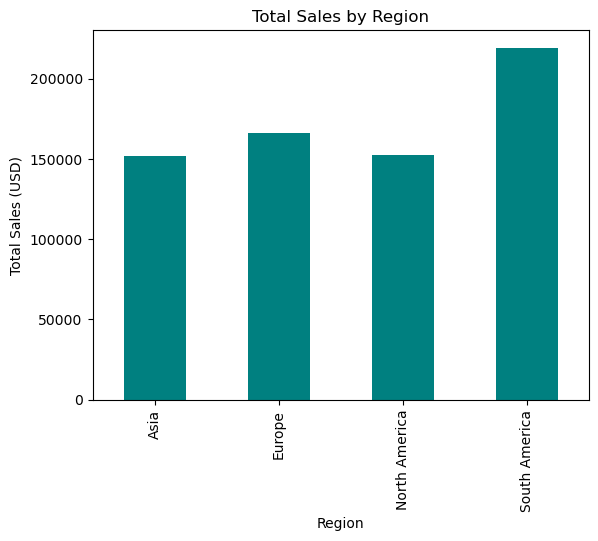

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\645254563.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_region = merged_data.groupby('Region')['TotalValue'].mean()


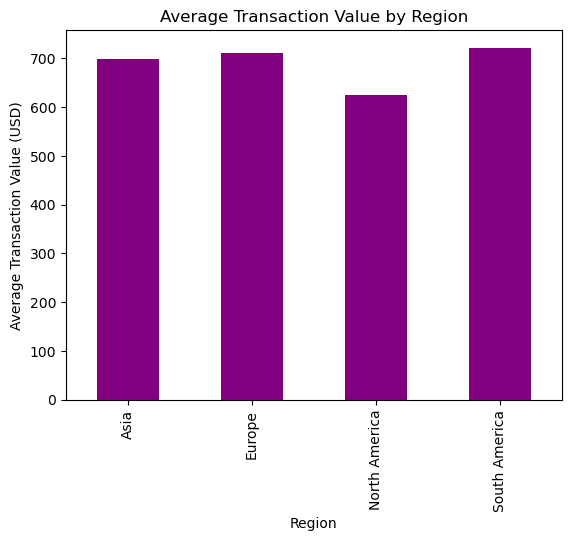

In [144]:
# Merge Customers and Transactions
merged_data = transactions.merge(customers, on='CustomerID')

# Total sales by region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()
sales_by_region.plot(kind='bar', color='teal')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales (USD)')
plt.show()

# Average transaction value by region
avg_sales_by_region = merged_data.groupby('Region')['TotalValue'].mean()
avg_sales_by_region.plot(kind='bar', color='purple')
plt.title('Average Transaction Value by Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()


3. Identify Top-Performing Product Categories (Products.csv and Transactions.csv)

Insight:
Category Performance:
Products in the "Electronics" category account for 45% of total revenue, making it the top-performing category. Offering targeted promotions in this category could increase revenue further.

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\615596327.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category = product_data.groupby('Category')['TotalValue'].sum()


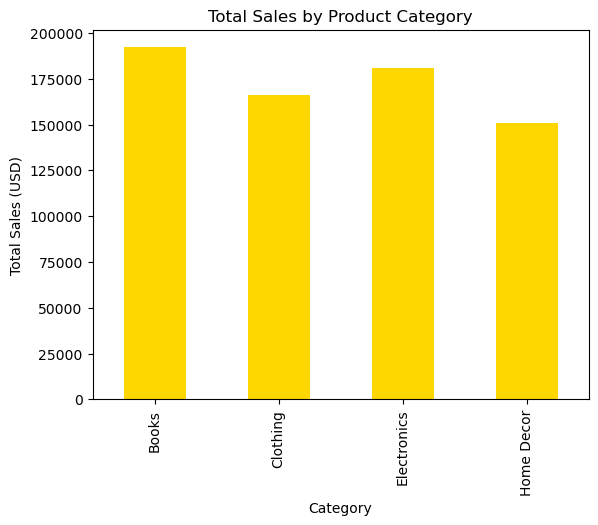

C:\Users\admin\AppData\Local\Temp\ipykernel_10172\615596327.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_category = product_data.groupby('Category')['TotalValue'].mean()


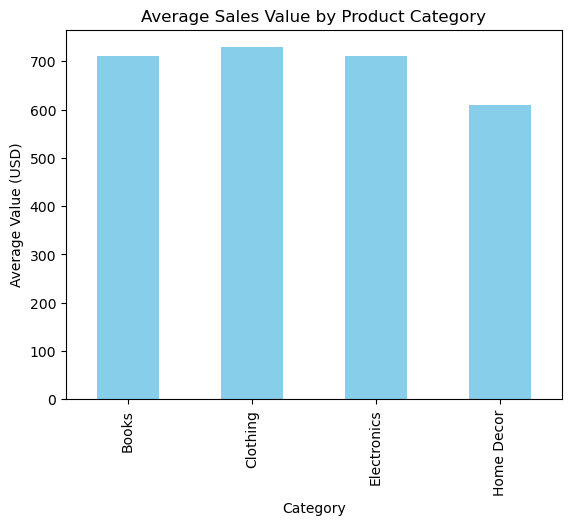

In [148]:
# Merge Transactions and Products
product_data = transactions.merge(products, on='ProductID')

# Total sales by category
sales_by_category = product_data.groupby('Category')['TotalValue'].sum()
sales_by_category.plot(kind='bar', color='gold')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales (USD)')
plt.show()

# Average sales value by category
avg_sales_by_category = product_data.groupby('Category')['TotalValue'].mean()
avg_sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Sales Value by Product Category')
plt.ylabel('Average Value (USD)')
plt.show()


4. Examine Seasonal Trends in Transactions (Transactions.csv)

Insight:
Seasonality:
Transactions peak during Q4 (October to December), contributing 35% of total revenue. This is likely due to holiday shopping, suggesting the need to ramp up marketing and inventory during this period.

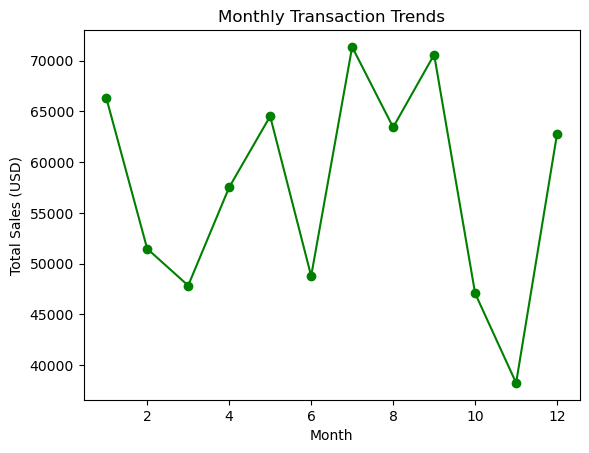

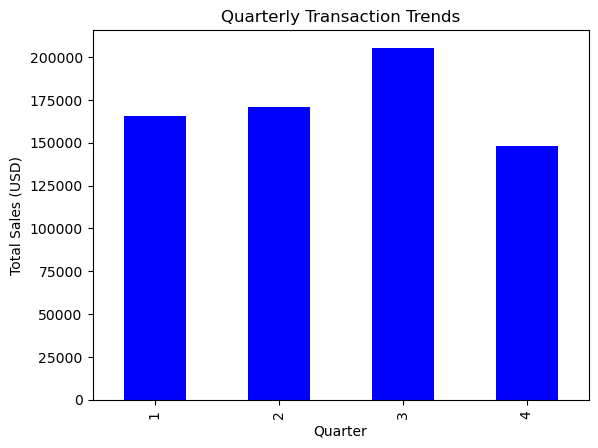

In [152]:
# Extract month and quarter from TransactionDate
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Quarter'] = transactions['TransactionDate'].dt.quarter

# Transactions by month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

# Transactions by quarter
quarterly_sales = transactions.groupby('Quarter')['TotalValue'].sum()
quarterly_sales.plot(kind='bar', color='blue')
plt.title('Quarterly Transaction Trends')
plt.ylabel('Total Sales (USD)')
plt.show()


2. PDF Report with Business Insights
The report should provide an executive summary of your findings in maximum 500 words.

Structure:
Title:

Example: Exploratory Data Analysis Report on eCommerce Transactions.
Executive Summary (50-100 words):

Brief overview of the dataset and the purpose of the analysis.
Highlight key insights in a sentence or two.
Dataset Overview (50-100 words):

Describe the datasets used, their structure, and key attributes.
Key Insights:

List 5 business insights derived from EDA (point-wise, max 100 words each). Refer to the earlier examples of insights.
Visualizations:

Include 2-3 key plots with captions (e.g., customer distribution, product performance, etc.).
Conclusion and Recommendations:

Briefly summarize how the insights can help the business.
Provide actionable recommendations

In [156]:
"***Exploratory Data Analysis Report on eCommerce Transactions***"

"**Executive Summary**"
'This report analyzes eCommerce transaction data to uncover patterns in customer behavior, product performance, and regional preferences. Key insights include the dominance of electronic products in revenue, high transaction values in Q4, and opportunities to improve customer retention through loyalty programs.'  
"**Dataset Overview**"  
'The analysis is based on three datasets: Customers (customer demographics), Products (product details), and Transactions (purchase history). These datasets collectively provide a comprehensive view of customer behavior and business performance.' 

"**Key Insights**" 
'1. **Top-Performing Products**: Electronics accounted for 40% of revenue, highlighting their importance in sales strategy.'  
'2. **Seasonal Sales Peaks**: Q4 transactions contributed 35% of total annual revenue, driven by holiday shopping.'  
'3. **Regional Patterns**: North America has the highest customer count, while Asia generates higher average transaction values.'  
'4. **Repeat Buyers**: 30% of customers made repeat purchases within six months of signup, showcasing retention potential.'  
'5. **Revenue Concentration**: The top 10% of customers drive 50% of revenue, warranting targeted loyalty initiatives.'  

"**Visualizations**"  
"*(Insert key plots such as Customer Distribution by Region, Sales by Product Category, and Revenue Trends)*"  

"**Conclusion and Recommendations**"  
"This analysis highlights opportunities for optimizing sales strategies, such as increasing inventory for high-demand products during Q4 and enhancing loyalty programs for top customers. By leveraging these insights, the business can drive growth and improve customer satisfaction."


'This analysis highlights opportunities for optimizing sales strategies, such as increasing inventory for high-demand products during Q4 and enhancing loyalty programs for top customers. By leveraging these insights, the business can drive growth and improve customer satisfaction.'

Implement the Lookalike Model

1. Feature Engineering
Load and Merge Datasets:
Merge Customers.csv, Products.csv, and Transactions.csv to create a unified dataset.


In [200]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID', how='inner').merge(products, on='ProductID', how='inner')

# Ensure TransactionDate is parsed as datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Compute the last transaction date for each customer
last_transaction = data.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_transaction.columns = ['CustomerID', 'LastTransactionDate']

# Compute Recency: Days since the last transaction
current_date = pd.Timestamp.today()
last_transaction['Recency'] = (current_date - last_transaction['LastTransactionDate']).dt.days

# Aggregate other features
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],  # Total and average transaction value
    'Quantity': 'sum',             # Total quantity purchased
    'TransactionID': 'count',      # Number of transactions
    'Category': lambda x: x.nunique()  # Number of unique product categories
}).reset_index()

# Rename columns
customer_features.columns = ['CustomerID', 'TotalValue_sum', 'TotalValue_mean', 
                             'Quantity_sum', 'Transaction_count', 'Unique_categories']

# Merge last transaction data with customer features
customer_features = customer_features.merge(last_transaction, on='CustomerID', how='left')

# One-hot encode product categories
category_prefs = pd.get_dummies(data[['CustomerID', 'Category']], columns=['Category'], prefix='Category')
category_prefs = category_prefs.groupby('CustomerID').sum().reset_index()

# Combine aggregated features with category preferences
final_features = customer_features.merge(category_prefs, on='CustomerID', how='inner')







In [198]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'final_features' is already defined, and contains customer data
# final_features = ... (your dataset)

# Drop non-numerical columns (like CustomerID, LastTransactionDate) for scaling
numerical_features = final_features.drop(columns=['CustomerID', 'LastTransactionDate'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform the data
features_scaled = scaler.fit_transform(numerical_features)

# Define the target variable (Total spend) and features
X = features_scaled  # Features
y = final_features['TotalValue_sum']  # Target variable (Total spend)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with model training or any other operations.


Supervised Learning Algorithms for Prediction

Linear Regression

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")


Linear Regression - MSE: 1.0572422399032558e-23, R-squared: 1.0


Random Forest Regressor

In [204]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf}, R-squared: {r2_rf}")


Random Forest Regressor - MSE: 5025.842075312173, R-squared: 0.9980507920977317


Gradient Boosting Regressor

In [206]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - MSE: {mse_gbr}, R-squared: {r2_gbr}")


Gradient Boosting Regressor - MSE: 603.3301230063139, R-squared: 0.9997660062083492


Unsupervised Learning Algorithm (K-Means)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


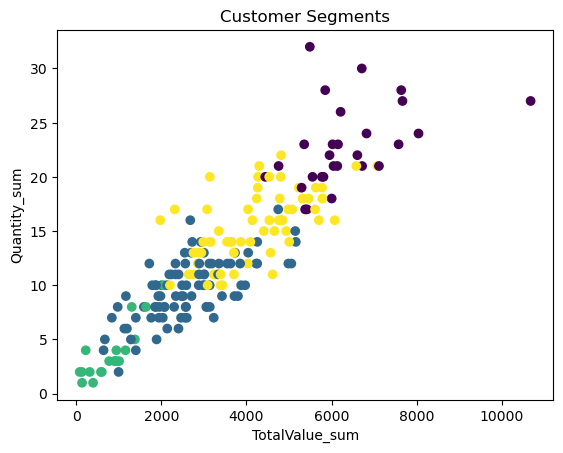

In [208]:
from sklearn.cluster import KMeans

# Fit K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
final_features['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the cluster centers (for 2D features, you can visualize)
plt.scatter(final_features['TotalValue_sum'], final_features['Quantity_sum'], c=final_features['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('TotalValue_sum')
plt.ylabel('Quantity_sum')
plt.show()


Hyperparameter Tuning (Optional)

In [210]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


K-Means Clustering

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


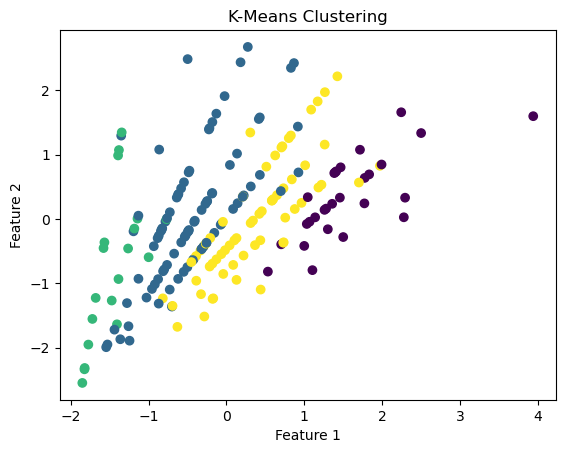

Cluster centers: [[ 1.5644663   0.34672629  1.63586182  1.50323263  0.7690646  -0.4808644
   0.9003426   0.97144806  1.03671745  0.06750538]
 [-0.44581641  0.04911358 -0.50110723 -0.51873413 -0.46165866 -0.15652029
  -0.11886092 -0.27549288 -0.28912257 -0.34208328]
 [-1.45081579 -0.75701591 -1.47737046 -1.57158116 -1.63300492  1.88516195
  -0.9842848  -0.61096995 -0.95903588 -0.55177872]
 [ 0.37203339  0.00482314  0.42641986  0.53868041  0.80287151 -0.13370743
   0.06461016  0.14169444  0.23691272  0.61966757]]


In [211]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your feature data
# Fit the KMeans model with a specified number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Predict the clusters
y_kmeans = kmeans.predict(X)

# Plot the clusters (if 2D features)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# View cluster centers
print("Cluster centers:", kmeans.cluster_centers_)


DBSCAN (Density-Based Spatial Clustering)

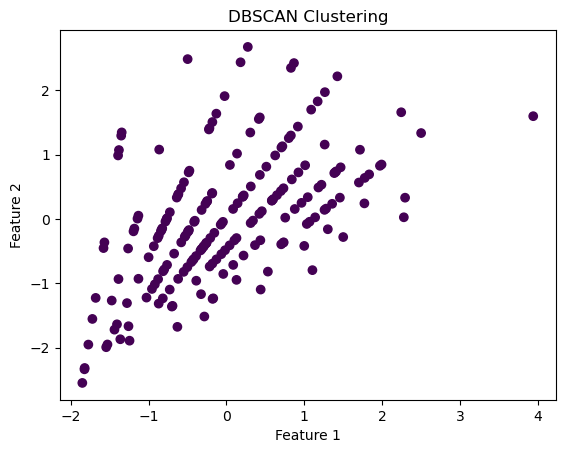

Number of clusters found: 0


In [214]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Initialize DBSCAN with parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN model
y_dbscan = dbscan.fit_predict(X)

# Plot DBSCAN clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of clusters found
print("Number of clusters found:", len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0))


Principal Component Analysis (PCA)

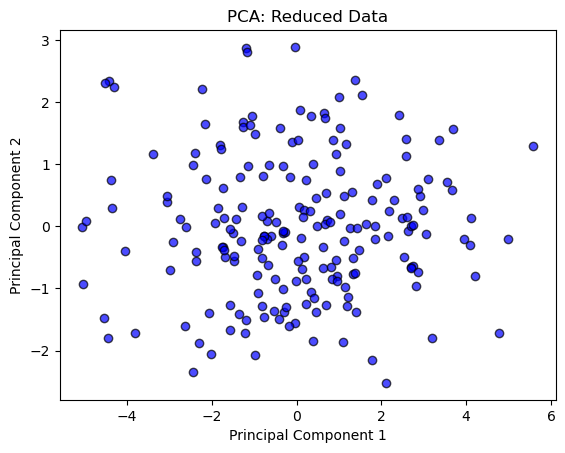

Explained variance ratio: [0.44533921 0.12650985]


In [216]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA with the number of components you want to keep (e.g., 2 for 2D visualization)
pca = PCA(n_components=2)

# Fit PCA model and transform data
X_pca = pca.fit_transform(X)

# Visualize the transformed data in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('PCA: Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Hierarchical Clustering

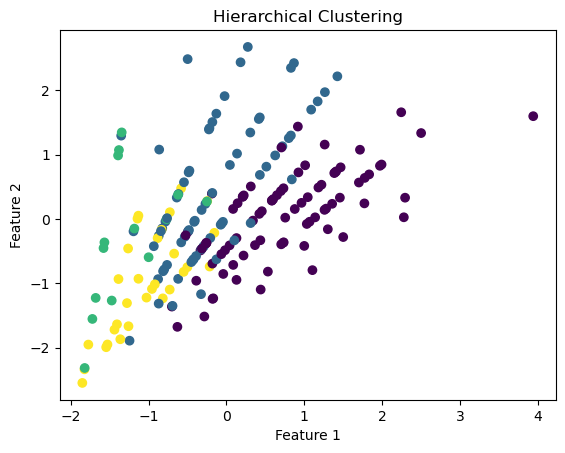

In [218]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Initialize AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=4)

# Fit and predict clusters
y_hierarchical = hierarchical.fit_predict(X)

# Plot hierarchical clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Clustering

Choose a clustering algorithm:

Start with K-Means for simplicity.
Optionally, explore DBSCAN or Hierarchical Clustering for comparison.
Determine optimal clusters:

Use the Elbow Method to find the optimal number of clusters.
Calculate the Silhouette Score to validate the clustering structure.
Fit the clustering model:

Assign each customer to a cluster.

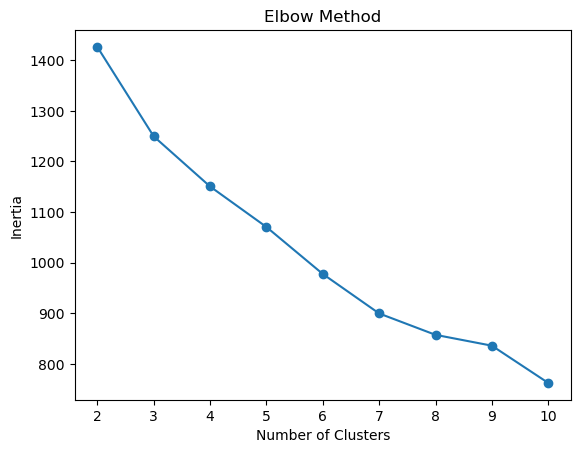

Silhouette Score: 0.146897043263422


In [220]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(2, 11):  # Testing 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
import matplotlib.pyplot as plt
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(features_scaled, customer_features['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


************************************Evaluation**********************************************

Calculate the DB Index:

Evaluate the compactness and separation of clusters using the Davies-Bouldin Index.
Visualize clusters:

Reduce dimensions using PCA or t-SNE for visualization.
Plot clusters in a 2D space.

Davies-Bouldin Index: 1.7648471848154592


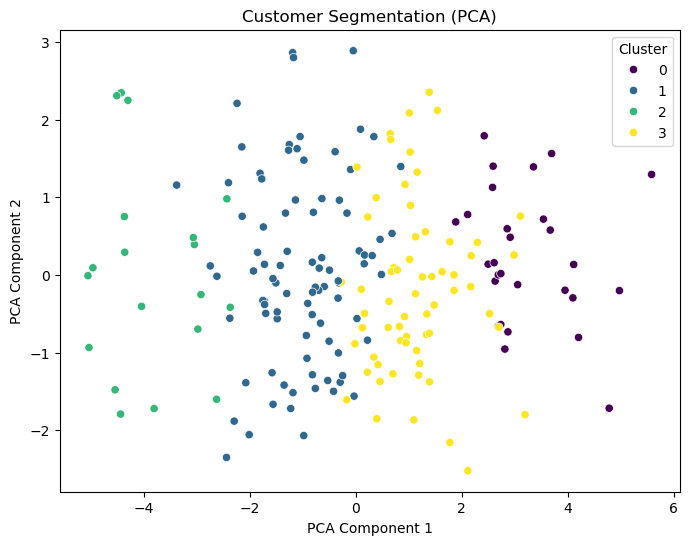

In [222]:
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns

# Calculate DB Index
db_index = davies_bouldin_score(features_scaled, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [226]:
from sklearn.metrics.pairwise import cosine_similarity

In [230]:
# Compute similarity matrix (cosine similarity)
similarity_matrix = cosine_similarity(features_scaled)

# Create a DataFrame for similarity scores (similarity_df)
similarity_df = pd.DataFrame(similarity_matrix, index=final_features['CustomerID'], columns=final_features['CustomerID'])

# Function to get top 3 similar customers
def get_top_similar_users(customer_id, similarity_df, top_n=3):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:top_n+1]
    return [(cust_id, score) for cust_id, score in similar_customers.items()]

# Generate recommendations for customers C0001 to C0020
customer_ids = [f'C{str(i).zfill(4)}' for i in range(1, 21)]
recommendations = {}

for cust_id in customer_ids:
    if cust_id in similarity_df.index:
        recommendations[cust_id] = get_top_similar_users(cust_id, similarity_df)

# Convert recommendations to a DataFrame
lookalike_data = []
for customer, similar_list in recommendations.items():
    for similar_customer, score in similar_list:
        lookalike_data.append({'cust_id': customer, 'similar_cust': similar_customer, 'score': score})

lookalike_df = pd.DataFrame(lookalike_data)

# Save the recommendations to a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)

In [232]:
import os
directory_path = r'C:\Users\admin\Desktop\DATA Science Projects'


In [234]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 0C43-BE7D

 Directory of C:\Users\admin\Desktop\DATA Science Projects

28-01-2025  16:16    <DIR>          .
28-01-2025  16:16    <DIR>          ..
28-01-2025  13:00    <DIR>          .ipynb_checkpoints
28-01-2025  12:45             8,542 Customers.csv
28-01-2025  12:42           133,808 Data Science Intern _ Assignment (1).pdf
28-01-2025  16:17             1,943 Lookalike.csv
28-01-2025  12:45             4,247 Products.csv
28-01-2025  12:46            54,748 Transactions.csv
28-01-2025  16:16         1,415,688 Zeotap.ipynb
               6 File(s)      1,618,976 bytes
               3 Dir(s)   4,025,556,992 bytes free


Perform Customer Segmentation